<a href="https://colab.research.google.com/github/Nihir2904/Advanced_NLP/blob/main/Huggingface1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.2 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

##Traditional approach
gives flexibility

In [ ]:
# tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

##Pipeline Route
gives speed

In [ ]:
emotion = pipeline('sentiment-analysis', model = 'arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
emotion_label = emotion(" I love you to the infinty and beyond")

In [ ]:
emotion_label

[{'label': 'love', 'score': 0.9864293336868286}]

In [ ]:
emotion_label[0]['label']

'love'

In [ ]:
import pandas as pd

In [18]:
large_text = pd.read_csv('https://github.com/abishekarun/Text-Emotion-Classification/blob/master/text_emotion.csv?raw=true')

In [19]:
large_text.shape

(40000, 4)

In [21]:
large_text.head(100)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
95,1956989514,sadness,yellowduckx,@sweeetnspicy hiii im on my ipod...i cant fall...
96,1956989526,sadness,KaKuBby,dont wanna work 11-830 tomorrow but i get paid
97,1956989560,sadness,benchidol,feels sad coz i wasnt able to play with the gu...
98,1956989561,neutral,outrAjusCharmer,PrinceCharming


import numpy as np
from google.colab import autoviz
df_4926857675604856884 = autoviz.get_registered_df('df_4926857675604856884')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4926857675604856884, *['tweet_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7392917410296596170 = autoviz.get_registered_df('df_7392917410296596170')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7392917410296596170, *['tweet_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2464438116760096929 = autoviz.get_registered_df('df_2464438116760096929')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2464438116760096929, *['tweet_id', 'count()', None], **{})
chart

In [22]:
large_text = large_text[:100]

In [23]:
large_text.shape

(100, 4)

In [24]:
large_text['content'][1:10].apply(emotion)

1    [{'label': 'neutral', 'score': 0.9288991093635...
2      [{'label': 'joy', 'score': 0.7030631899833679}]
3      [{'label': 'joy', 'score': 0.5057836771011353}]
4    [{'label': 'desire', 'score': 0.80342656373977...
5    [{'label': 'neutral', 'score': 0.9537403583526...
6    [{'label': 'neutral', 'score': 0.3837682008743...
7    [{'label': 'approval', 'score': 0.636144876480...
8     [{'label': 'love', 'score': 0.9831995964050293}]
9    [{'label': 'remorse', 'score': 0.4822780787944...
Name: content, dtype: object

In [25]:
def get_emotion(text):
  return(emotion(text)[0]['label'])

In [27]:
 get_emotion("he acts dumb, smells filthy and works terribly")

'disgust'

In [35]:
large_text['emotion'] = large_text['content'][1:10].apply(get_emotion)

In [36]:
import seaborn as sns

Text(0.5, 1.0, 'emotion distribution')

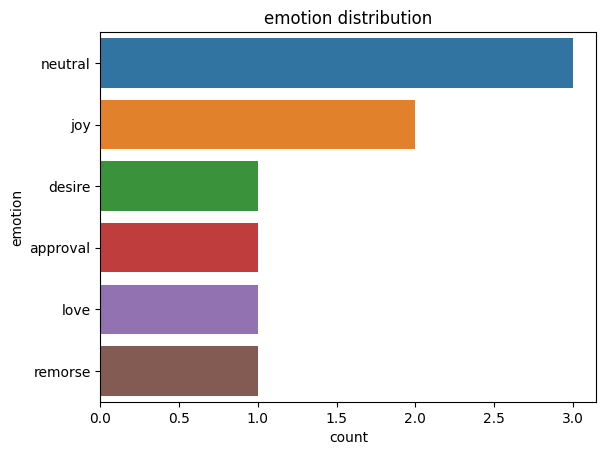

In [38]:
sns.countplot(data = large_text, y = 'emotion').set_title("emotion distribution")